# Generating ROC Curves

In [18]:
import sys
sys.path.append("../")

from __init__ import *
from data_tools import *
from testing import *

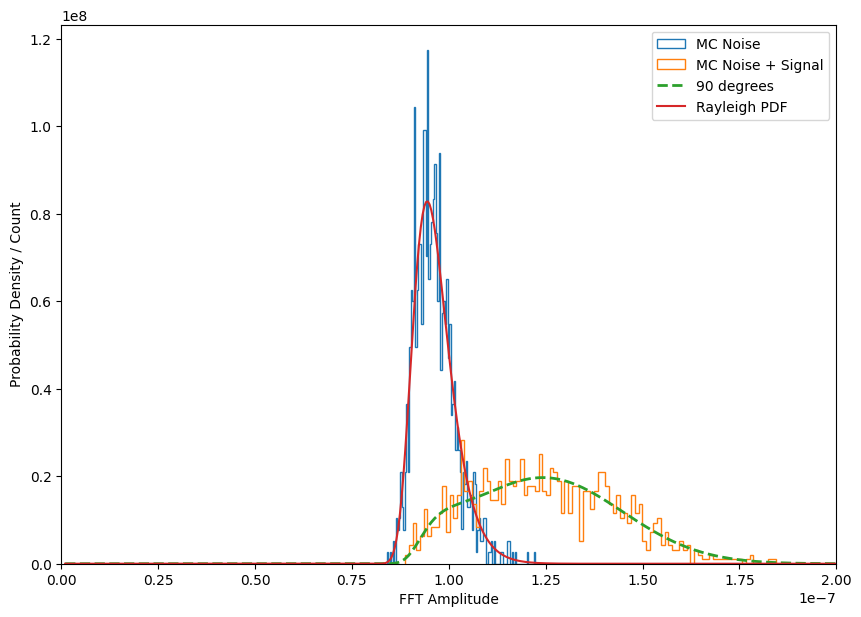

In [ ]:
R, Nch, kb, bw, Nsamp, T= 496.1709043911709, 1, 1.38e-23, 1000e6, 40960, 5

n_pwr = kb * T * bw # noise power
tau_1t = n_pwr * R # noise variance single channel, time-domain (tau_1t)
tau_1f = tau_1t / Nsamp # noise variance single channel, freq-domain (tau_1f)

# single-channel complex wgn with total variance tau_1t
rng = np.random.default_rng()
noise_1t = rng.multivariate_normal([0,0], np.eye(2) * tau_1t/2, Nsamp) # variance is divided by two for correct total variance.
noise_1t = noise_1t[:,0] + 1j * noise_1t[:,1]
noise_1f = np.fft.fft(noise_1t, norm='forward')

#####################

x = np.linspace(1e-9,9e-6, 20001)

ray_cdf = (1-np.exp(-(x**2)/tau_1f)) ** Nsamp
ray_pdf = np.gradient(ray_cdf, x[1]-x[0])

N = 1000

noise = rng.multivariate_normal([0,0],np.eye(2)*tau_1f/2, N*Nsamp) # Generate a 2d gaussian
noise = noise[:,0] + 1j * noise[:,1] # Sample from said Gaussian to get a complex number 
noise = noise.reshape(N, Nsamp) # Reshape the gaussian to be 3d
noise_max = np.max(abs(noise), axis=1) # Take the maximum of the N samples

#######################################################

file_list = ['harmonic/90deg/out_0a5a3368-a72b-4392-9ccd-bbcaf9762cbd.h5']

harmonic_angles = ['90']

for i, file_ in enumerate(file_list):


    signal_strings, attributes, attrs_container = get_attributes(file_)
    signal = get_signal(file_, 'signal1') # One polarisation
    signal_FFT = np.fft.fft(signal, norm='forward')

    signal_max = np.max(abs(signal_FFT))
    signal_max_index = np.argmax(abs(signal_FFT))
    complex_signal_max = signal_FFT[signal_max_index]

    peaks = np.array([complex_signal_max])
    
    peak_inds = np.array([signal_max_index])
    
    validation_noise = rng.multivariate_normal([0,0],np.eye(2)*tau_1f/2, N*Nsamp)
    validation_noise = validation_noise[:,0] + 1j * validation_noise[:,1]
    validation_noise = validation_noise.reshape(N, Nsamp)
    validation_noise_maxima = np.max(abs(validation_noise),axis=1)
    
    validation_noise[:, peak_inds] += peaks
    validation_signal_maxima = np.max(abs(validation_noise),axis=1)

    rice_cdf = np.ones(20001)
    for peak in peaks:
        rice_cdf *= scipy.stats.rice.cdf(x, b=abs(peak)/np.sqrt(tau_1f/2), loc=0, scale=np.sqrt(tau_1f/2))
        
    signal_cdf = rice_cdf * (1-np.exp(-(x**2)/tau_1f)) ** (Nsamp-peaks.size)

    signal_pdf = np.gradient(signal_cdf, x[1]-x[0])

    signal_label = str(harmonic_angles[i]) + ' degrees'

    steal_cdf = signal_cdf
    steal_pdf = signal_pdf


############################################################################################################

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()
plt.hist(validation_noise_maxima, bins=100, density=True, histtype='step', label='MC Noise')
plt.hist(validation_signal_maxima, bins=100, density=True, histtype='step', label='MC Noise + Signal')
ax.plot(x, signal_pdf, label = signal_label, ls='--', lw=2)
ax.plot(x,  ray_pdf, label='Rayleigh PDF');
ax.set_xlim(0, 0.2e-6)

plt.legend()

plt.ylabel('Probability Density / Count')
plt.xlabel('FFT Amplitude')
plt.show()

# ############################################################################################################


In [20]:
# def calculate_signal_pdf(x, tau, loc, peaks, Nsamp):

#     rice_cdf = np.ones(len(x))
#     for peak in peaks:
#         rice_cdf *= scipy.stats.rice.cdf(x, b=abs(peak)/np.sqrt(tau/2), loc=loc, scale=np.sqrt(tau/2))
            
#     cdf = rice_cdf * (1-np.exp(-(y**2)/tau_1f)) ** (Nsamp-peaks.size)

#     pdf = np.gradient(signal_cdf, y[1]-y[0])
    
#     return pdf
    
# def calculate_noise_pdf(x, tau, Nsamp):
#     ray_cdf = (1-np.exp(-(x**2)/tau)) ** Nsamp
#     ray_pdf = np.gradient(ray_cdf, x[1]-x[0])
    
#     return ray_pdf

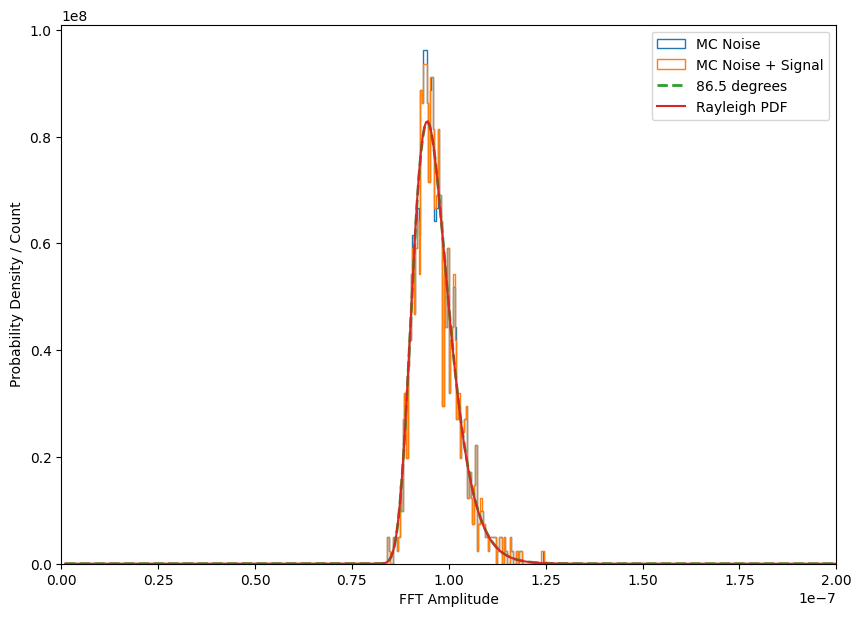

<Figure size 640x480 with 0 Axes>

In [21]:
R, Nch, kb, bw, Nsamp, T= 496.1709043911709, 1, 1.38e-23, 1000e6, 40960, 5

n_pwr = kb * T * bw # noise power
tau_1t = n_pwr * R # noise variance single channel, time-domain (tau_1t)
tau_1f = tau_1t / Nsamp # noise variance single channel, freq-domain (tau_1f)

# single-channel complex wgn with total variance tau_1t
rng = np.random.default_rng()
noise_1t = rng.multivariate_normal([0,0], np.eye(2) * tau_1t/2, Nsamp) # variance is divided by two for correct total variance.
noise_1t = noise_1t[:,0] + 1j * noise_1t[:,1]
noise_1f = np.fft.fft(noise_1t, norm='forward')

#####################


# x = np.linspace(2e-7,5e-7, 1001)
x = np.linspace(1e-9,9e-6, 20001)

ray_cdf = (1-np.exp(-(x**2)/tau_1f)) ** Nsamp
ray_pdf = np.gradient(ray_cdf, x[1]-x[0])

N = 1000

noise = rng.multivariate_normal([0,0],np.eye(2)*tau_1f/2, N*Nsamp) # Generate a 2d gaussian
noise = noise[:,0] + 1j * noise[:,1] # Sample from said Gaussian to get a complex number 
noise = noise.reshape(N, Nsamp) # Reshape the gaussian to be 3d
noise_max = np.max(abs(noise), axis=1) # Take the maximum of the N samples

#######################################################

file_list = ['harmonic/86p5deg/out_0aa72c89-416e-4f11-8eda-ae7542078817.h5']

harmonic_angles = ['86.5']

y = np.linspace(1e-9, 9e-6, 20001)


for i, file_ in enumerate(file_list):


    signal_strings, attributes, attrs_container = get_attributes(file_)
    signal = get_signal(file_, 'signal1') # One polarisation
    signal_FFT = np.fft.fft(signal, norm='forward')

    signal_max = np.max(abs(signal_FFT))
    signal_max_index = np.argmax(abs(signal_FFT))
    complex_signal_max = signal_FFT[signal_max_index]

    peaks1 = np.array([complex_signal_max])
    
    peak_inds = np.array([signal_max_index])
    
    validation_noise = rng.multivariate_normal([0,0],np.eye(2)*tau_1f/2, N*Nsamp)
    validation_noise = validation_noise[:,0] + 1j * validation_noise[:,1]
    validation_noise = validation_noise.reshape(N, Nsamp)
    validation_noise_maxima = np.max(abs(validation_noise),axis=1)
    
    validation_noise[:, peak_inds] += peaks1
    validation_signal_maxima = np.max(abs(validation_noise),axis=1)

    rice_cdf = np.ones(20001)
    for peak in peaks1:
        rice_cdf *= scipy.stats.rice.cdf(x, b=abs(peak)/np.sqrt(tau_1f/2), loc=0, scale=np.sqrt(tau_1f/2))
        
    signal_cdf = rice_cdf * (1-np.exp(-(y**2)/tau_1f)) ** (Nsamp-peaks1.size)

    signal_pdf = np.gradient(signal_cdf, y[1]-y[0])

    signal_label = str(harmonic_angles[i]) + ' degrees'

    stealing1 = signal_pdf
    stealingcdf = signal_cdf


############################################################################################################

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()
plt.hist(validation_noise_maxima, bins=100, density=True, histtype='step', label='MC Noise')
plt.hist(validation_signal_maxima, bins=100, density=True, histtype='step', label='MC Noise + Signal')
ax.plot(x, signal_pdf, label = signal_label, ls='--', lw=2)
ax.plot(x,  ray_pdf, label='Rayleigh PDF');
ax.set_xlim(0, 0.2e-6)

plt.legend()

plt.ylabel('Probability Density / Count')
plt.xlabel('FFT Amplitude')
plt.show()

# ############################################################################################################







plt.figure()

plt.show()


In [22]:
# # Generate example distributions
# def calculate_signal_cdf(vals, tau, loc, FFT_peaks, Nsamp):

#     rice_cdf = np.ones(len(vals))
#     for peak in FFT_peaks:
#         rice_cdf *= scipy.stats.rice.cdf(vals, b=abs(peak)/np.sqrt(tau/2), loc=loc, scale=np.sqrt(tau/2))
            
#     cdf = rice_cdf * (1-np.exp(-(vals**2)/tau)) ** (Nsamp-FFT_peaks.size)

#     pdf = np.gradient(signal_cdf, vals[1]-vals[0])
    
#     return cdf, pdf
    
# def calculate_noise_cdf(vals, tau, Nsamp):
#     ray_cdf = (1-np.exp(-(vals**2)/tau)) ** Nsamp
#     ray_pdf = np.gradient(ray_cdf, vals[1]-vals[0])
    
#     return ray_cdf, ray_pdf


# from scipy import stats

# threshold = np.linspace(1e-9, 9e-6, 20001)


# noise_pdf = calculate_noise_cdf(threshold, tau_1f, Nsamp)[1]
# # signal_pdf = calculate_signal_cdf(threshold, tau_1f, 0, peaks, Nsamp)[1]
# # signal86p5 = calculate_signal_cdf(threshold, tau_1f, 0, peaks1, Nsamp)[1]

# # Calculate CDFs
# noise_cdf = calculate_noise_cdf(threshold, tau_1f, Nsamp)[0]
# # signal_cdf = calculate_signal_cdf(threshold, tau_1f, 0, peaks, Nsamp)[0]
# # signal_cdf86p5 = calculate_signal_cdf(threshold, tau_1f, 0, peaks1, Nsamp)[0]

# # Calculate ROC points (FPR = 1-specificity, TPR = sensitivity)
# fpr = 1 - noise_cdf  # false positive rate
# tpr = 1 - steal_cdf  # true positive rate
# tpr86p5 = 1 - stealingcdf

# # Plot distributions and ROC curve
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# # Plot PDFs
# ax1.plot(threshold, noise_pdf, 'r--', label='Noise PDF')
# ax1.plot(threshold, steal_pdf, 'b--', label='Signal PDF')
# ax1.plot(threshold, stealing1, 'g--', label='Signal PDF 86.5')
# ax1.fill_between(threshold, noise_pdf, alpha=0.3, color='red')
# ax1.fill_between(threshold, steal_pdf, alpha=0.3, color='blue')
# ax1.fill_between(threshold, stealing1, alpha=0.3, color='green')
# ax1.set_xlabel('Threshold')
# ax1.set_ylabel('Probability Density')
# ax1.legend()
# ax1.set_xlim(0, 0.2e-6)
# ax1.grid(True)

# # Plot ROC curve
# ax2.plot(fpr, tpr, 'g-', linewidth=2, label='ROC Curve 90')
# ax2.plot(fpr, tpr86p5, 'b-', linewidth=2, label='ROC Curve 86.5')
# ax2.plot([0, 1], [0, 1], 'k--')  # random guess line
# ax2.set_xlabel('False Positive Rate')
# ax2.set_ylabel('True Positive Rate')
# ax2.grid(True)
# ax2.set_aspect('equal')
# ax2.legend()

# # Calculate AUC
# auc = abs(np.trapz(tpr, fpr))
# auc1 = abs(np.trapz(tpr86p5, fpr))
# ax2.text(0.6, 0.8, f'AUC = {auc:.3f}', bbox=dict(facecolor='white'))
# ax2.text(0.6, 0.7, f'AUC = {auc1:.3f}', bbox=dict(facecolor='white'))

# plt.tight_layout()
# plt.show()

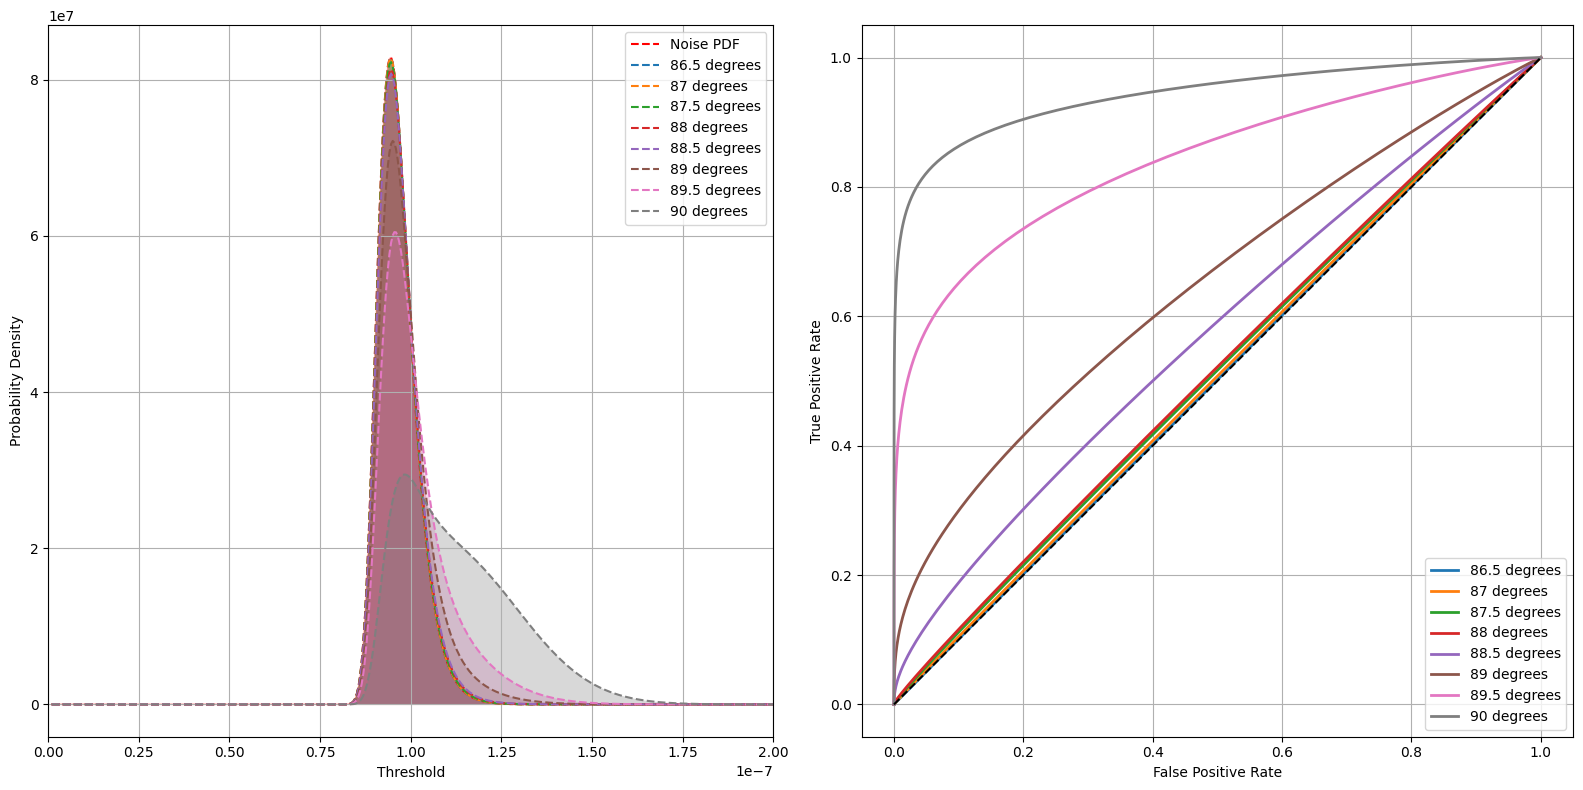

In [23]:
# Generate example distributions
def calculate_signal_cdf(vals, tau, loc, FFT_peaks, Nsamp):

    rice_cdf = np.ones(len(vals))
    for peak in FFT_peaks:
        rice_cdf *= scipy.stats.rice.cdf(vals, b=abs(peak)/np.sqrt(tau/2), loc=loc, scale=np.sqrt(tau/2))
            
    cdf = rice_cdf * (1-np.exp(-(vals**2)/tau)) ** (Nsamp-FFT_peaks.size)

    pdf = np.gradient(signal_cdf, vals[1]-vals[0])
    
    return cdf, pdf
    
def calculate_noise_cdf(vals, tau, Nsamp):
    ray_cdf = (1-np.exp(-(vals**2)/tau)) ** Nsamp
    ray_pdf = np.gradient(ray_cdf, vals[1]-vals[0])
    
    return ray_cdf, ray_pdf


from scipy import stats

threshold = np.linspace(1e-9, 9e-6, 20001)


noise_pdf = calculate_noise_cdf(threshold, tau_1f, Nsamp)[1]
# signal_pdf = calculate_signal_cdf(threshold, tau_1f, 0, peaks, Nsamp)[1]
# signal86p5 = calculate_signal_cdf(threshold, tau_1f, 0, peaks1, Nsamp)[1]

# Calculate CDFs
noise_cdf = calculate_noise_cdf(threshold, tau_1f, Nsamp)[0]
# signal_cdf = calculate_signal_cdf(threshold, tau_1f, 0, peaks, Nsamp)[0]
# signal_cdf86p5 = calculate_signal_cdf(threshold, tau_1f, 0, peaks1, Nsamp)[0]

# Calculate ROC points (FPR = 1-specificity, TPR = sensitivity)
fpr = 1 - noise_cdf  # false positive rate


file_list = [
    'harmonic/86p5deg/out_0aa72c89-416e-4f11-8eda-ae7542078817.h5', 
    'harmonic/87deg/out_0a5c4e19-2fc3-4f5c-9090-8d2cce62ae19.h5', 
    'harmonic/87p5deg/out_0c7fdf39-0ea3-4c84-9a9d-60c68b480bb1.h5', 
    'harmonic/88deg/out_0ad74f8f-ec02-44f5-a5af-5c69bef4774e.h5',
    'harmonic/88p5deg/out_0a1bc7f8-6e25-47f3-9743-f404227c3d0b.h5',
    'harmonic/89deg/out_1a0ad631-1153-47ef-8cba-ea9ab0cefa3d.h5',
    'harmonic/89p5deg/out_51db499d-c8ea-4cce-884b-d9c3e3f44ed1.h5',
    'harmonic/90deg/out_0a5a3368-a72b-4392-9ccd-bbcaf9762cbd.h5']

harmonic_angles = ['86.5', '87', '87.5', '88', '88.5', '89','89.5', '90']

# Plot distributions and ROC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot PDFs
ax1.plot(threshold, noise_pdf, 'r--', label='Noise PDF')
ax1.fill_between(threshold, noise_pdf, alpha=0.3, color='red')

aucs = []

for i, file_name in enumerate(file_list):

    signal_strings, attributes, attrs_container = get_attributes(file_name)
    signal = get_signal(file_name, 'signal1') # One polarisation
    signal_FFT = np.fft.fft(signal, norm='forward')

    signal_max = np.max(abs(signal_FFT))
    signal_max_index = np.argmax(abs(signal_FFT))
    complex_signal_max = signal_FFT[signal_max_index]


    peaks = np.array([complex_signal_max])

    signal_cdf, signal_pdf = calculate_signal_cdf(threshold, tau_1f, 0, peaks, Nsamp)


    tpr = 1 - signal_cdf  # true positive rate

    signal_label = str(harmonic_angles[i]) + ' degrees'
    
    ax1.plot(threshold, signal_pdf, '--', label=signal_label)
    ax1.fill_between(threshold, signal_pdf, alpha=0.3)
    # Plot ROC curve
    
    roc_label = str(harmonic_angles[i]) + ' degrees'
    
    ax2.plot(fpr, tpr, '-', linewidth=2, label=roc_label) 
    auc = abs(np.trapz(tpr, fpr))
    aucs.append(auc)


ax1.set_xlabel('Threshold')
ax1.set_ylabel('Probability Density')
ax1.legend()
ax1.set_xlim(0, 0.2e-6)
ax1.grid(True)


ax2.plot([0, 1], [0, 1], 'k--')  # random guess line
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.grid(True)
ax2.set_aspect('equal')
ax2.legend()

plt.tight_layout()
plt.show()

Peak: (9.609851997553602e-09+3.639786768913486e-08j)
Peak: (3.163385991252356e-09-4.828482680099675e-08j)
Peak: (-1.3076463242401225e-10+5.546728153875903e-08j)
Peak: (-4.8305119313785026e-08-3.222003002261413e-08j)
Peak: (-3.949840800122516e-08-6.366780914324188e-08j)
Peak: (-8.577666327209864e-08-2.992571772432541e-09j)
Peak: (-3.754525417204697e-08-1.0081831901307937e-07j)
Peak: (-1.116848286875947e-07+5.115380693849318e-08j)


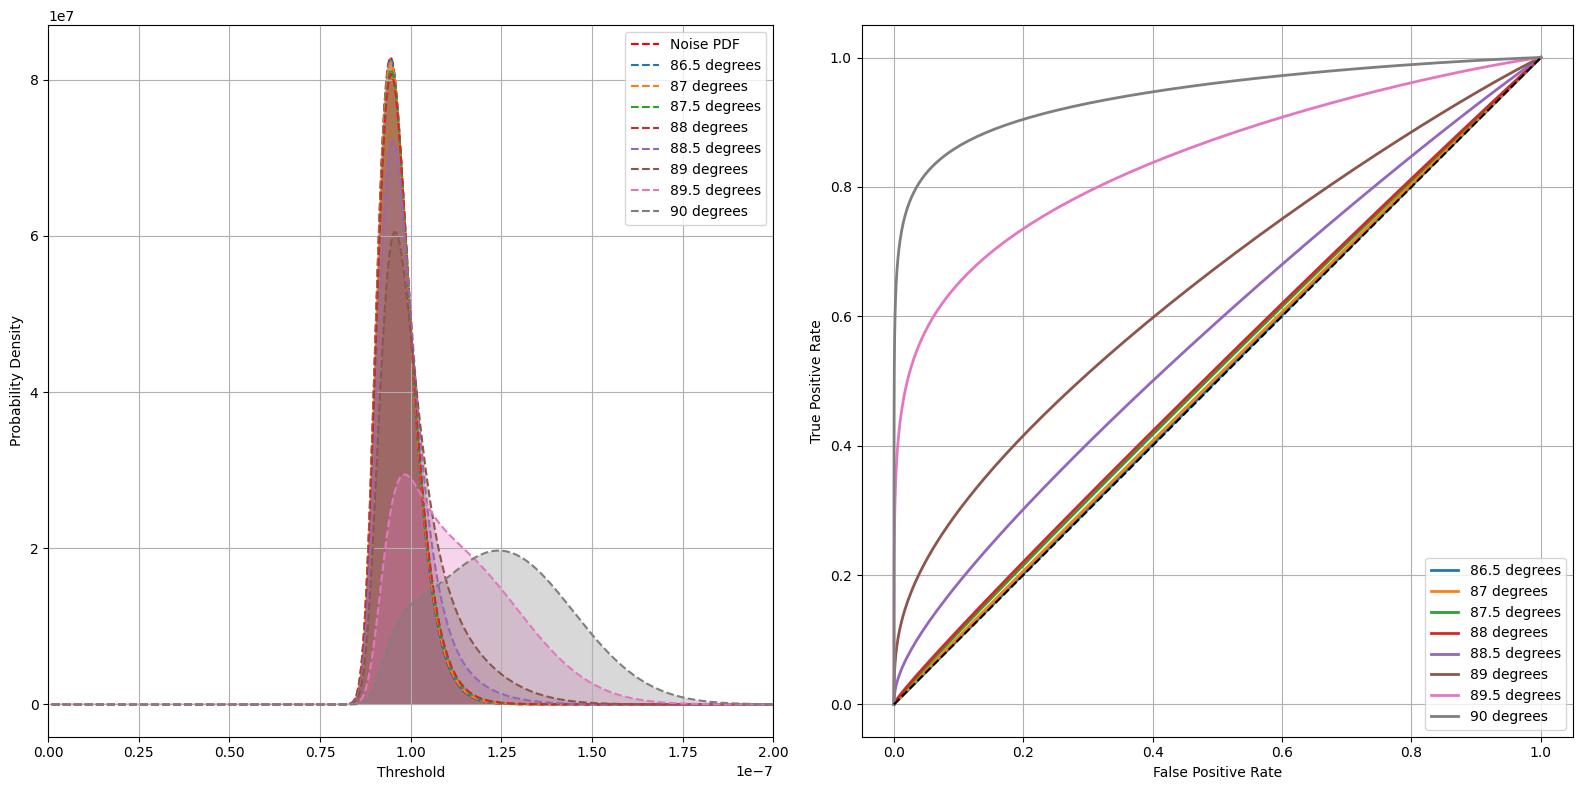

In [36]:



from scipy import stats

threshold = np.linspace(1e-9, 9e-6, 20001)


noise_pdf = calculate_noise_cdf(threshold, tau_1f, Nsamp)[1]
# signal_pdf = calculate_signal_cdf(threshold, tau_1f, 0, peaks, Nsamp)[1]
# signal86p5 = calculate_signal_cdf(threshold, tau_1f, 0, peaks1, Nsamp)[1]

# Calculate CDFs
noise_cdf = calculate_noise_cdf(threshold, tau_1f, Nsamp)[0]
# signal_cdf = calculate_signal_cdf(threshold, tau_1f, 0, peaks, Nsamp)[0]
# signal_cdf86p5 = calculate_signal_cdf(threshold, tau_1f, 0, peaks1, Nsamp)[0]

# Calculate ROC points (FPR = 1-specificity, TPR = sensitivity)
fpr = 1 - noise_cdf  # false positive rate


file_list = [
    'harmonic/86p5deg/out_0aa72c89-416e-4f11-8eda-ae7542078817.h5', 
    'harmonic/87deg/out_0a5c4e19-2fc3-4f5c-9090-8d2cce62ae19.h5', 
    'harmonic/87p5deg/out_0c7fdf39-0ea3-4c84-9a9d-60c68b480bb1.h5', 
    'harmonic/88deg/out_0ad74f8f-ec02-44f5-a5af-5c69bef4774e.h5',
    'harmonic/88p5deg/out_0a1bc7f8-6e25-47f3-9743-f404227c3d0b.h5',
    'harmonic/89deg/out_1a0ad631-1153-47ef-8cba-ea9ab0cefa3d.h5',
    'harmonic/89p5deg/out_51db499d-c8ea-4cce-884b-d9c3e3f44ed1.h5',
    'harmonic/90deg/out_0a5a3368-a72b-4392-9ccd-bbcaf9762cbd.h5']

harmonic_angles = ['86.5', '87', '87.5', '88', '88.5', '89','89.5', '90']

# Plot distributions and ROC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot PDFs
ax1.plot(threshold, noise_pdf, 'r--', label='Noise PDF')
ax1.fill_between(threshold, noise_pdf, alpha=0.3, color='red')

aucs = []

for i, file_name in enumerate(file_list):

    signal_strings, attributes, attrs_container = get_attributes(file_name)
    signal = get_signal(file_name, 'signal1') # One polarisation
    signal_FFT = np.fft.fft(signal, norm='forward')

    # signal_maximums = signal_FFT[signal_FFT > 1e-8]
    # peaks = np.array(signal_maximums)
    
    # print(peaks)
    
    signal_max_index = np.argmax(abs(signal_FFT))
    complex_signal_max = signal_FFT[signal_max_index]


    peaks = np.array([complex_signal_max])
    
    # print(peaks)

    rice_cdf = np.ones(20001)
    for peak in peaks:
        print('Peak:', peak)
        rice_cdf *= scipy.stats.rice.cdf(x, b=abs(peak)/np.sqrt(tau_1f/2), loc=0, scale=np.sqrt(tau_1f/2))
        
    signal_cdf = rice_cdf * (1-np.exp(-(x**2)/tau_1f)) ** (Nsamp-peaks.size)

    signal_pdf = np.gradient(signal_cdf, x[1]-x[0])


    tpr = 1 - signal_cdf  # true positive rate

    signal_label = str(harmonic_angles[i]) + ' degrees'
    
    ax1.plot(threshold, signal_pdf, '--', label=signal_label)
    ax1.fill_between(threshold, signal_pdf, alpha=0.3)
    # Plot ROC curve
    
    roc_label = str(harmonic_angles[i]) + ' degrees'
    
    ax2.plot(fpr, tpr, '-', linewidth=2, label=roc_label) 
    auc = abs(np.trapz(tpr, fpr))
    aucs.append(auc)


ax1.set_xlabel('Threshold')
ax1.set_ylabel('Probability Density')
ax1.legend()
ax1.set_xlim(0, 0.2e-6)
ax1.grid(True)


ax2.plot([0, 1], [0, 1], 'k--')  # random guess line
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.grid(True)
ax2.set_aspect('equal')
ax2.legend()

plt.tight_layout()
plt.show()